In [2]:
import pandas as pd 
import numpy as np
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectFromModel, SelectKBest, chi2
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import train_test_split   
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.metrics import accuracy_score 
from sklearn.base import TransformerMixin 
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import naive_bayes, metrics

import networkx as nx
import csv
from collections import defaultdict
import sys
from matplotlib import pyplot as plt
import math

In [3]:
f = open('train.txt')
sources = defaultdict(int)
sinks = defaultdict(int)
follows = defaultdict(int)
followedby = defaultdict(int)

for line in f.readlines():
    splitted_line = line.split()
    src, dests = splitted_line[0], splitted_line[1:]
    sources[src] = len(dests)
    for dest in dests:
        sinks[dest] += 1

f.close()

In [5]:
print('dict sizes in Mb: ', sys.getsizeof(sources) / 10**6, sys.getsizeof(sinks) / 10**6)
print('number of sources and sinks: ', len(sources), len(sinks))

dict sizes in Mb:  0.589936 167.772272
number of sources and sinks:  20000 4867136


## 1. select n super sources and m sinks

super sources with >= 6744 links


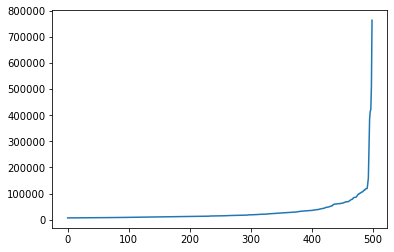

In [10]:
n = 500
m = 500

# super sources (follows many perple)
plt.plot(sorted(list(sources.values()))[20000-n:])
print('super sources with >=', sorted(list(sources.values()))[20000-n], 'links')

super sinks with >= 714 links


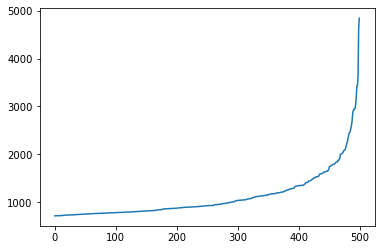

In [7]:
# super sinks (followed by many people)
plt.plot(sorted(list(sinks.values()))[4867136-m:])
print('super sinks with >=', sorted(list(sinks.values()))[4867136-m], 'links')

In [8]:
super_sources = list(map(lambda x: int(x[0]) ,sorted(sources.items(), key=lambda item: item[1], reverse = True)[:n])) 
super_sinks = list(map(lambda x: int(x[0]) ,sorted(sinks.items(), key=lambda item: item[1], reverse = True)[:m])) 

## 2. build groups from super nodes

In [ ]:
# run bfs from all super nodes, depth limited to k
k = 2


In [ ]:
(0,1,0)

## 3. generate features for edges

## 4. combine features

## 5. Train and test models

In [ ]:
def train_model(classifier, feature_vector_train, label, feature_vector_valid, is_neural_net=False):
    # fit the training dataset on the classifier
    classifier.fit(feature_vector_train, label)
    
    # predict the labels on validation dataset
    predictions = classifier.predict(feature_vector_valid)
    
    return predictions

In [ ]:
def valid_model(classifier, feature_vector_train, label, feature_vector_valid, is_neural_net=False):
    # fit the training dataset on the classifier
    classifier.fit(feature_vector_train, label)
    
    # predict the labels on validation dataset
    predictions = classifier.predict(feature_vector_valid)
    
    if is_neural_net:
        predictions = predictions.argmax(axis=-1)
    
    return metrics.accuracy_score(predictions, valid_y)

In [ ]:
# Naive Bayes on Count Vectors
from sklearn.naive_bayes import MultinomialNB 
#ComplementNB

pred_data = train_model(naive_bayes.MultinomialNB(), xtrain_count, train_y, xtest_count)
accuracy = valid_model(naive_bayes.MultinomialNB(), xtrain_count, train_y, xvalid_count)
print ("MNB, Count Vectors: ", accuracy)
print(pred_data)

In [ ]:
result = pd.DataFrame()
result['Id'] = test_raw['ID']
result['Predicted'] = pred_data
result.to_csv('MultinomialNB.csv', sep=',', index=False)

## 6. submit prediction